
# Malaria Detection Data Exploration with TensorFlow Datasets

This notebook uses TensorFlow Datasets (TFDS) to load and preprocess the Malaria dataset. The steps include:

1. Loading the dataset using TFDS.
2. Visualizing sample images from the dataset.
3. Preprocessing images for deep learning model training.
4. Build a Convolutional Neural Network (CNN)
        

## Importing libraries

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


## Loading and preprocessing 

Loading the Malaria dataset...
Train size: 22046
Validation size: 2756
Test size: 2756
Visualizing a few samples from the training dataset...


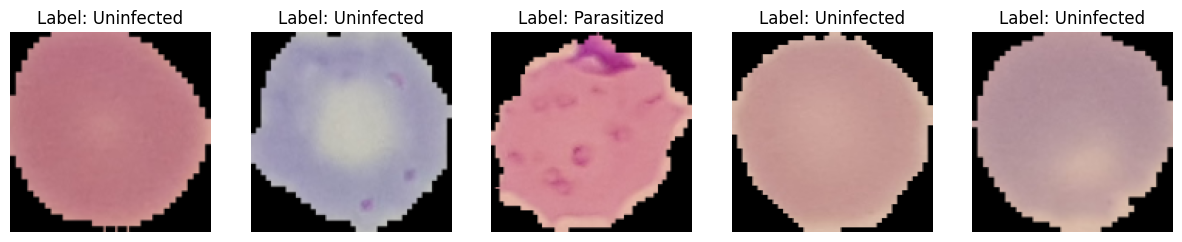

Dataset details:
Number of training batches: 689
Number of validation batches: 87
Number of test batches: 87


In [ ]:

# Step 1: Load the Dataset
print("Loading the Malaria dataset...")
dataset, info = tfds.load(
    'malaria',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],  # Split directly using slicing
    with_info=True,
    as_supervised=True  # Ensure (image, label) pairs
)

train_data, validation_data, test_data = dataset  # Assign splits
print(f"Train size: {info.splits['train'].num_examples * 0.8:.0f}")
print(f"Validation size: {info.splits['train'].num_examples * 0.1:.0f}")
print(f"Test size: {info.splits['train'].num_examples * 0.1:.0f}")

# Step 2: Preprocess the Data
def preprocess_image(image, label):
    """Resize and normalize the image."""
    image = tf.image.resize(image, (130, 130))  # Resize to a consistent size
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    return image, label

# Apply preprocessing to the datasets
train_data = train_data.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
validation_data = validation_data.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# Step 3: Batch and Prefetch
batch_size = 32
train_data = train_data.batch(batch_size).prefetch(tf.data.AUTOTUNE)
validation_data = validation_data.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Step 4: Visualize a Few Samples
def visualize_samples(dataset, num_samples=5):
    """Visualize examples from the dataset."""
    plt.figure(figsize=(15, 5))
    for i, (image, label) in enumerate(dataset.unbatch().take(num_samples)):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image.numpy())
        plt.title(f"Label: {'Parasitized' if label.numpy() == 0 else 'Uninfected'}")
        plt.axis('off')
    plt.show()

print("Visualizing a few samples from the training dataset...")
visualize_samples(train_data)

# Step 5: Print Dataset Details
print("Dataset details:")
print(f"Number of training batches: {len(train_data)}")
print(f"Number of validation batches: {len(validation_data)}")
print(f"Number of test batches: {len(test_data)}")


## Build a Convolutional Neural Network (CNN)

c:\data\simplon_dev_ia_projects\flask_projects\malaria_detection\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Summary:


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 147s 210ms/step - accuracy: 0.7128 - loss: 0.5182 - val_accuracy: 0.9430 - val_loss: 0.1889
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 134s 194ms/step - accuracy: 0.9443 - loss: 0.1699 - val_accuracy: 0.9536 - val_loss: 0.1528
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 131s 190ms/step - accuracy: 0.9562 - loss: 0.1412 - val_accuracy: 0.9496 - val_loss: 0.1629
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 131s 190ms/step - accuracy: 0.9589 - loss: 0.1280 - val_accuracy: 0.9517 - val_loss: 0.1506
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 136s 197ms/step - accuracy: 0.9633 - loss: 0.1137 - val_accuracy: 0.9528 - val_loss: 0.1513
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 136s 197ms/step - accuracy: 0.9665 - loss: 0.0983 - val_accuracy: 0.9536 - val_loss: 0.1442
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 130s 189ms/step - accuracy: 0.9713 - loss: 0.0845 - val_accuracy: 0.9543 - val_loss: 0.1525
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 131s 190ms/step - accuracy: 0.9752 -

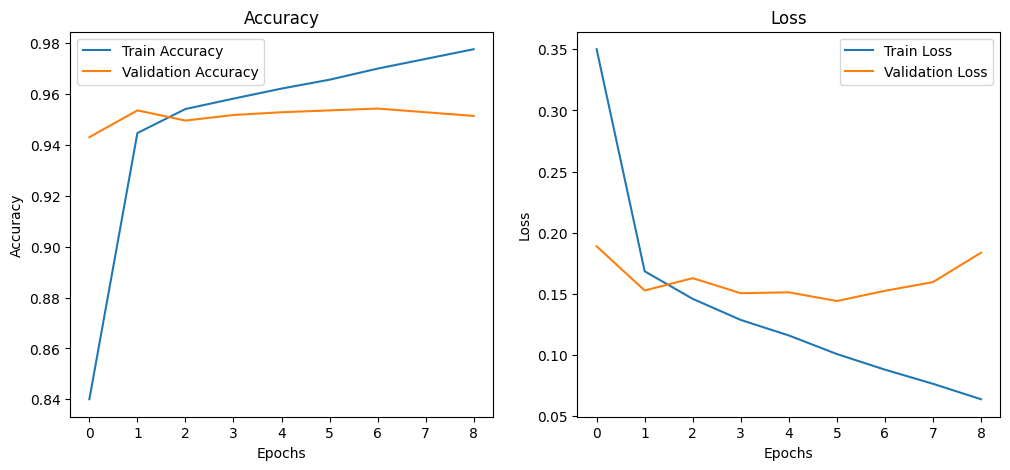

Model saved as 'malaria_cnn_model.h5'


In [33]:


# Step 6: Define the CNN Model
def build_model(input_shape=(130, 130, 3)):
    model = models.Sequential([
        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        # Flatten and fully connected layers
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # Prevent overfitting
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

# Build and compile the model
model = build_model()
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
print("Model Summary:")
model.summary()

# Step 7: Train the Model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=10,  # Adjust based on computational power
    callbacks=[early_stopping]
)

# Step 8: Evaluate on Test Data
print("Evaluating on test data...")
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 9: Visualize Training History
def plot_training_history(history):
    """Plot training and validation loss and accuracy."""
    plt.figure(figsize=(12, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss')
    
    plt.show()

# Visualize the training history
plot_training_history(history)

# Step 10: Save the Model
model.save('malaria_cnn_model.h5')
print("Model saved as 'malaria_cnn_model.h5'")


##  Building another CNN using data augmentation for better results and confusion matrix visualization 

Model Summary:


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 177s 255ms/step - accuracy: 0.7092 - loss: 0.5487 - val_accuracy: 0.9416 - val_loss: 0.1826
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 172s 249ms/step - accuracy: 0.9399 - loss: 0.1909 - val_accuracy: 0.9528 - val_loss: 0.1556
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 172s 249ms/step - accuracy: 0.9530 - loss: 0.1591 - val_accuracy: 0.9543 - val_loss: 0.1521
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 164s 238ms/step - accuracy: 0.9539 - loss: 0.1535 - val_accuracy: 0.9543 - val_loss: 0.1436
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 167s 243ms/step - accuracy: 0.9551 - loss: 0.1452 - val_accuracy: 0.9557 - val_loss: 0.1332
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 168s 243ms/step - accuracy: 0.9554 - loss: 0.1413 - val_accuracy: 0.9510 - val_loss: 0.1454
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 166s 241ms/step - accuracy: 0.9554 - loss: 0.1396 - val_accuracy: 0.9557 - val_loss: 0.1365
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 166s 241ms/step - accuracy: 0.9581 -

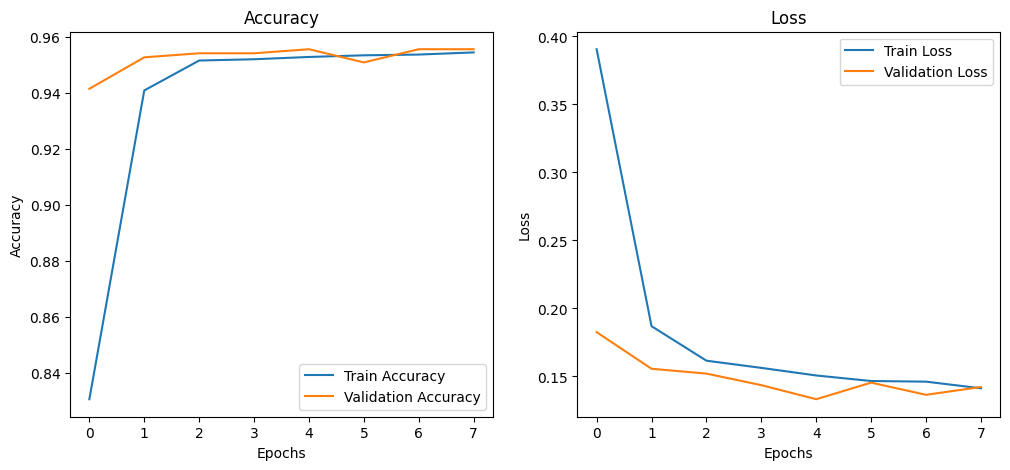

Model saved as 'malaria_cnn_model_with_augmentation.h5'
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step


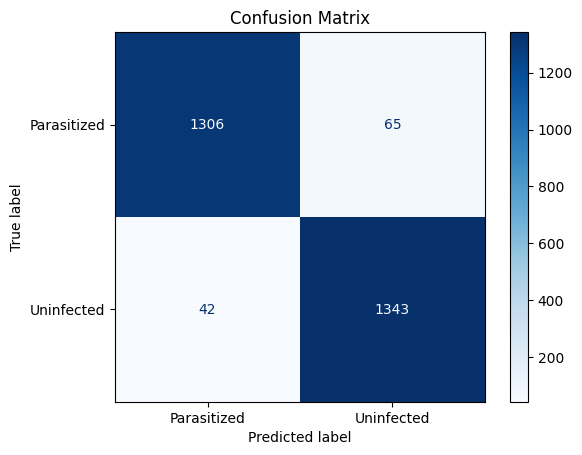

In [ ]:

# Step 6: Define the CNN Model
def build_model(input_shape=(130, 130, 3)):
    model = models.Sequential([
        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        # Flatten and fully connected layers
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # Prevent overfitting
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

# Build and compile the model
model = build_model()
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
print("Model Summary:")
model.summary()

# Step 7: Add Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1)
])

# Augment the training dataset
def preprocess_with_augmentation(image, label):
    image = data_augmentation(image)
    return image, label

train_data = train_data.map(preprocess_with_augmentation)

# Step 8: Train the Model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=10,  # Adjust based on computational power
    callbacks=[early_stopping]
)

# Step 9: Evaluate on Test Data
print("Evaluating on test data...")
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 10: Visualize Training History
def plot_training_history(history):
    """Plot training and validation loss and accuracy."""
    plt.figure(figsize=(12, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss')
    
    plt.show()

# Visualize the training history
plot_training_history(history)

# Step 11: Save the Model
model.save('malaria_cnn_model_with_augmentation.h5')
print("Model saved as 'malaria_cnn_model_with_augmentation.h5'")

# Step 12: Confusion Matrix
def plot_confusion_matrix(model, test_data):
    """Generate and display the confusion matrix."""
    # Get predictions and true labels
    y_pred = (model.predict(test_data) > 0.5).astype(int)
    y_true = np.concatenate([y for _, y in test_data], axis=0)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Parasitized", "Uninfected"])
    
    # Plot the confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(model, test_data)
